['SF', 'DRC', 'DMF', 'IFC-ODE$^2$', 'IFC-GPODE', 'IFHoGP']
['Ground-truth', 'IFHoGP']
(256, 64, 64)


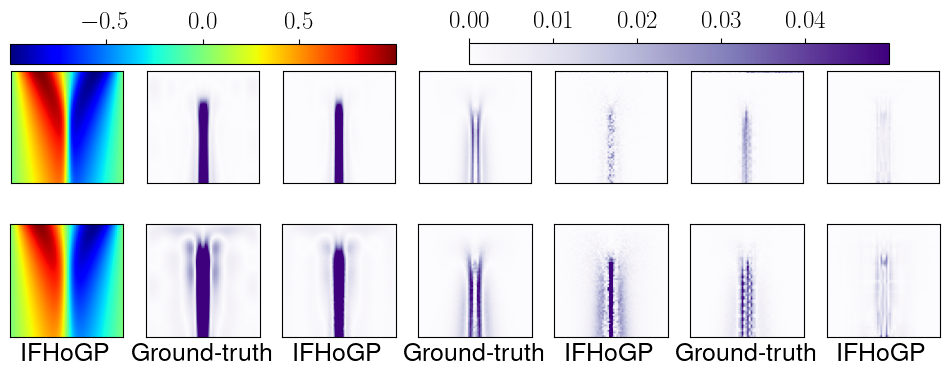

In [13]:
import numpy as np
import os
import pickle

from infras.misc import *

from matplotlib import rc
import matplotlib.pylab as plt



plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size":18,
})

domain = 'burgers'
fold = 1
base = 20

# samples_idx = [50,56,201,128]

samples_idx = [50,149]

# methods_list = ['dc', 'dmf', 'hogp', 'sf_net', 'ifc_ode', 'ifc_gpt']
methods_list = ['sf_net', 'dc', 'dmf', 'ifc_ode', 'ifc_gpt', 'hogp']
# methods_list = ['DC', 'DMFAL', 'SFid', 'MFHoGP', 'InfFidODE', 'InfFidGPT']

dict_method_to_label = {
    'dc'           : 'DRC', 
    'dmf'        : 'DMF', 
    'ifc_ode'    : r'IFC-ODE$^2$', 
    'ifc_gpt'    : 'IFC-GPODE', 
    'sf_net'         : 'SF',
    'hogp' : 'IFHoGP'
}

labels_list = [dict_method_to_label[method] for method in methods_list]
print(labels_list)
labels_list = ['Ground-truth', 'IFHoGP']
print(labels_list)

raw_preds_path = 'data/__freezed_predicts__'
raw_preds_name = 'preds_{}.pickle'.format(domain)

with open(os.path.join(raw_preds_path, raw_preds_name), 'rb') as handle:
    raw_preds = pickle.load(handle)
    
ground = raw_preds['ground']

print(ground.shape)

fig, axs = plt.subplots(len(samples_idx), 7, figsize=(12,4))

imgs = []

for j, idx in enumerate(samples_idx):
    
    imgs_row = []
    
    ground_idx = ground[idx, :]
    img = axs[j, 0].imshow(ground[idx, :], cmap='jet')
    axs[j, 0].set_xticks([])
    axs[j, 0].set_yticks([])
    
    imgs_row.append(img)
    
    vmax = 0.05*np.max(np.abs(ground_idx))
    
    for m, method in enumerate(methods_list):
        
#         print(raw_preds[method][base][fold].shape)
#         err_field = np.abs(dict_preds[method][idx, :])

        err_field = np.abs(ground_idx-raw_preds[method][base][fold][idx, :])
        img = axs[j, m+1].imshow(
            err_field/np.mean(np.abs(ground_idx)),
            cmap='Purples',
            vmin=0.0, vmax=vmax,
        )
        axs[j, m+1].set_xticks([])
        axs[j, m+1].set_yticks([])
        
        imgs_row.append(img)
        
    imgs.append(imgs_row)
        
for iax, ax in enumerate(axs.flat):

    y_label = labels_list[iax%len(labels_list)]

    ax.set(xlabel=y_label)
    
for ax in axs.flat:
    ax.label_outer()
    
    
# fig.colorbar(imgs[3][0], ax=axs[0, :3], shrink=1, location='top')
# fig.colorbar(imgs[2][1], ax=axs[0, 3:], shrink=1, location='top')

# fig.colorbar(imgs[1][0], ax=axs[0, :3], shrink=1, location='top')
# fig.colorbar(imgs[0][1], ax=axs[0, 3:], shrink=1, location='top')
fig.colorbar(imgs[1][0], ax=axs[0, :3], shrink=1, location='top')
fig.colorbar(imgs[0][1], ax=axs[0, 3:], shrink=1, location='top')



figure_path = '__figs__'
create_path(figure_path)

figure_name = 'errors_' + domain + '_IFHoGP' + '.pdf'

plt.savefig(os.path.join(figure_path, figure_name), format='pdf',bbox_inches='tight')
    
    
    


